# Code to evaluate momentum and energy budgets in NeverWorld2

In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib
# matplotlib.rcParams['font.sans-serif'] = "Latin Modern Roman"
matplotlib.rcParams['font.family'] = "serif"
matplotlib.rcParams['mathtext.fontset'] = "cm"
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
import xarray as xr
from xgcm import Grid
import numpy as np
import cmocean

In [2]:
import matplotlib.colors as colors

class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

The momentum equation for layer $k$ is given by

\begin{align}
    \frac{\partial \mathbf{u}_k}{\partial t} + \left(\frac{{f} + {\zeta}_k}{h_k} \right) \hat{\mathbf{k}} \times \left( \mathbf{u}_k h_k \right) + \nabla K_k = - \sum_{i=1}^{k} g_{i-1/2}^\prime \nabla \eta_{i-1/2} + F_{hor} + F_{vert}
    \; 
    \label{eqn:u} \;,
\end{align}

where $\mathbf{u}_k$ is the horizontal velocity of layer $k$, $h_k$ is the layer thickness, and $\eta_k$ is the height of the upper surface of the layer relative to the reference height. $\zeta_k\hat{\mathbf{k}} \equiv \nabla \times \mathbf{u}_k$ and $K_k = \left(\mathbf{u}_k \cdot \mathbf{u}_k \right)/2$. $F_{hor}$ and $F_{vert}$ are the horizontal and vertical friction terms. In the model, the zonal and meridional components of the second term, $- \left(({f} + {\zeta}_k)/ h_k \right) \hat{\mathbf{k}} \times \left( \mathbf{u}_k h_k \right) - \nabla K_k$, are diagnosed as CAu and CAv.

The runs needed to run this analysis are run 20 (1/4 degree) and run 26 (1/8 degree). The model takes roughly 30000 days to equilibrate:

/glade/p/univ/unyu0004/neerajab/NeverWorld2


/glade/u/apps/dav/opt/python/3.7.5/gnu/8.3.0/pkg-library/20200417/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/glade/u/apps/dav/opt/python/3.7.5/gnu/8.3.0/pkg-library/20200417/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/glade/u/apps/dav/opt/python/3.7.5/gnu/8.3.0/pkg-library/20200417/lib/p

/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


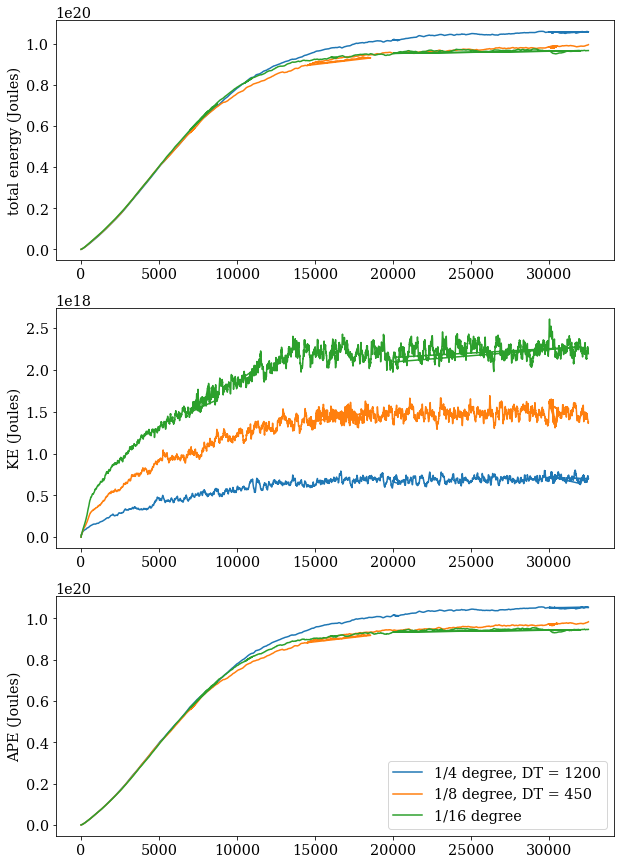

In [8]:
run = [20,26,28]
plt.figure(figsize=(10,15))
%cd /glade/p/univ/unyu0004/neerajab/NeverWorld2/
for i in range(len(run)):
    plt.subplot(3,1,1)
    os = xr.open_dataset('run%i/ocean.stats.nc' % run[i], decode_times=False)
    plt.plot(os.Time,os.En)
    plt.ylabel('total energy (Joules)')   
    plt.subplot(3,1,2)
    plt.plot(os.Time,os.KE.sum(axis=1))
    plt.ylabel('KE (Joules)')
    plt.subplot(3,1,3)
    plt.plot(os.Time,os.APE.sum(axis=1))
    plt.ylabel('APE (Joules)')

plt.gca().legend(('1/4 degree, DT = 1200', '1/8 degree, DT = 450','1/16 degree')) # DT is the time-step used to run the model
# The slight kink on the 1/8 degree run at 14500 days is because the time-step needed to be reduced because of high CFL and needed a restart.
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis

/glade/p/univ/unyu0004/neerajab/NeverWorld2/runGM


/glade/u/apps/dav/opt/python/3.7.5/gnu/8.3.0/pkg-library/20200417/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/glade/u/apps/dav/opt/python/3.7.5/gnu/8.3.0/pkg-library/20200417/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/glade/u/apps/dav/opt/python/3.7.5/gnu/8.3.0/pkg-library/20200417/lib/p

/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


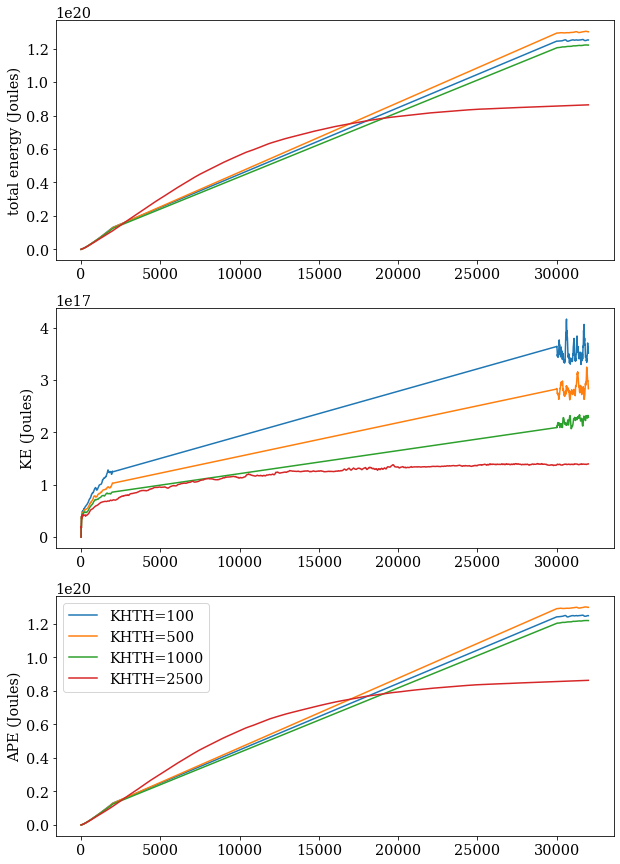

In [5]:
run = [1,3,5,6]
plt.figure(figsize=(10,15))
%cd /glade/p/univ/unyu0004/neerajab/NeverWorld2/runGM/
for i in range(len(run)):
    plt.subplot(3,1,1)
    os = xr.open_dataset('run%i/ocean.stats.nc' % run[i], decode_times=False)
    plt.plot(os.Time,os.En)
    plt.ylabel('total energy (Joules)')   
    plt.subplot(3,1,2)
    plt.plot(os.Time,os.KE.sum(axis=1))
    plt.ylabel('KE (Joules)')
    plt.subplot(3,1,3)
    plt.plot(os.Time,os.APE.sum(axis=1))
    plt.ylabel('APE (Joules)')

plt.gca().legend(('KHTH=100', 'KHTH=500','KHTH=1000','KHTH=2500')) # DT is the time-step used to run the model
# The slight kink on the 1/8 degree run at 14500 days is because the time-step needed to be reduced because of high CFL and needed a restart.
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis

In [4]:
tau = 500*86400
end_time = 30500
start_time = end_time - tau/86400
run = 20 # change the run number here to evaluate different runs
layer_no = 0 # the alternative is to do layer-averaged diagnostics but here I am looking at one layer in the interior




In [5]:
%cd /glade/p/univ/unyu0004/neerajab/NeverWorld2/
sn = xr.open_dataset('run%i/snapshots_000%i.nc' % (run, end_time-500+5), decode_times=False)
av = xr.open_dataset('run%i/averages_000%i.nc' % (run, end_time-500+2), decode_times=False)
st = xr.open_dataset('run%i/static.nc' % run, decode_times=False)
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


/glade/p/univ/unyu0004/neerajab/NeverWorld2
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [6]:
xh = st.xh.values
yh = st.yh.values
xq = st.xq.values
yq = st.yq.values




In [7]:
av
#Wind stress no longer saved?

<xarray.Dataset>
Dimensions:     (nv: 2, time: 100, xh: 240, xq: 241, yh: 560, yq: 561, zi: 16, zl: 15)
Coordinates:
  * xq          (xq) float64 0.0 0.25 0.5 0.75 1.0 ... 59.25 59.5 59.75 60.0
  * yh          (yh) float64 -69.88 -69.62 -69.38 -69.12 ... 69.38 69.62 69.88
  * zl          (zl) float64 1.023e+03 1.023e+03 ... 1.028e+03 1.028e+03
  * time        (time) float64 3e+04 3.001e+04 3.001e+04 ... 3.049e+04 3.05e+04
  * nv          (nv) float64 1.0 2.0
  * xh          (xh) float64 0.125 0.375 0.625 0.875 ... 59.12 59.38 59.62 59.88
  * yq          (yq) float64 -70.0 -69.75 -69.5 -69.25 ... 69.25 69.5 69.75 70.0
  * zi          (zi) float64 1.022e+03 1.023e+03 ... 1.028e+03 1.028e+03
Data variables:
    u           (time, zl, yh, xq) float32 ...
    v           (time, zl, yq, xh) float32 ...
    h           (time, zl, yh, xh) float32 ...
    e2          (time, zi, yh, xh) float32 ...
    uh          (time, zl, yh, xq) float32 ...
    vh          (time, zl, yq, xh) float32 ...
    PV          (time, zl, yq, xq) float32 ...
    dudt        (time, zl, yh, xq) float32 ...
    dvdt        (time, zl, yq, xh) float32 ...
    CAu         (time, zl, yh, xq) float32 ...
    CAv         (time, zl, yq, xh) float32 ...
    PFu         (time, zl, yh, xq) float32 ...
    PFv         (time, zl, yq, xh) float32 ...
    diffu       (time, zl, yh, xq) float32 ...
    diffv       (time, zl, yq, xh) float32 ...
    du_dt_visc  (time, zl, yh, xq) float32 ...
    dv_dt_visc  (time, zl, yq, xh) float32 ...
    u_BT_accel  (time, zl, yh, xq) float32 ...
    v_BT_accel  (time, zl, yq, xh) float32 ...
    KE          (time, zl, yh, xh) float32 ...
    dKE_dt      (time, zl, yh, xh) float32 ...
    PE_to_KE    (time, zl, yh, xh) float32 ...
    KE_BT       (time, zl, yh, xh) float32 ...
    KE_CorAdv   (time, zl, yh, xh) float32 ...
    KE_adv      (time, zl, yh, xh) float32 ...
    KE_visc     (time, zl, yh, xh) float32 ...
    KE_horvisc  (time, zl, yh, xh) float32 ...
    average_T1  (time) float64 ...
    average_T2  (time) float64 ...
    average_DT  (time) float64 ...
    time_bnds   (time, nv) float64 ...
Attributes:
    filename:          averages_00030002.nc
    title:             NeverWorld2
    associated_files:  area_t: static.nc
    grid_type:         regular
    grid_tile:         N/A

In [8]:
# plt.figure(figsize=(23,8))
# plt.subplot(1,4,1)
# plt.pcolormesh(xq,yh,av.taux.astype(float).values[-1],norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',vmin=-0.1,vmax=0.2)
# plt.title('Zonal surface stress (atm/ice) [Pa]'); 
# plt.gca().set_aspect('equal', adjustable='box')
# plt.colorbar()
# #
# plt.subplot(1,4,2)
# plt.pcolormesh(xq,yh,av.taux_bot.astype(float).values[-1],norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',vmin=-0.1,vmax=0.2)
# plt.title('Zonal bottom stress (ocean to Earth) [Pa]');
# plt.gca().set_aspect('equal', adjustable='box')
# plt.colorbar()
# #
# plt.subplot(1,4,3)
# plt.pcolormesh(xh,yq,av.tauy.astype(float).values[-1],norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',vmin=-0.1,vmax=0.2)
# plt.gca().set_aspect('equal', adjustable='box')
# plt.title('Meridional surface stress (atm/ice) [Pa]');
# plt.colorbar()
# #
# plt.subplot(1,4,4)
# plt.pcolormesh(xh,yq,av.tauy_bot.astype(float).values[-1],norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',vmin=-0.1,vmax=0.2)
# plt.gca().set_aspect('equal', adjustable='box')
# plt.title('Meridional bottom stress (ocean to Earth) [Pa]');
# plt.colorbar()


In [9]:
layer_no = 0 # the alternative is to do layer-averaged diagnostics but here I am looking at one layer in the interior

term1_u = av.dudt.astype(float).values[-1,layer_no]
term2_u = av.CAu.astype(float).values[-1,layer_no]
term3_u = av.PFu.astype(float).values[-1,layer_no]
term4_u = av.u_BT_accel.astype(float).values[-1,layer_no] 
term5_u = av.diffu.astype(float).values[-1,layer_no]
term6_u = av.du_dt_visc.astype(float).values[-1,layer_no] #- av.taux.astype(float).values[-1] - av.taux_bot.astype(float).values[-1]

M_u = term1_u - term2_u - term3_u - term4_u - term5_u - term6_u # This is the zonal component of the residual from the momentum equation

In [10]:
term1_v = av.dvdt.astype(float).values[-1,layer_no]
term2_v = av.CAv.astype(float).values[-1,layer_no]
term3_v = av.PFv.astype(float).values[-1,layer_no]
term4_v = av.v_BT_accel.astype(float).values[-1,layer_no] 
term5_v = av.diffv.astype(float).values[-1,layer_no]
term6_v = av.dv_dt_visc.astype(float).values[-1,layer_no] #- av.tauy.astype(float).values[-1] - av.tauy_bot.astype(float).values[-1]

M_v = term1_v - term2_v - term3_v - term4_v - term5_v - term6_v # This is the meridional component of the residual from the momentum equation

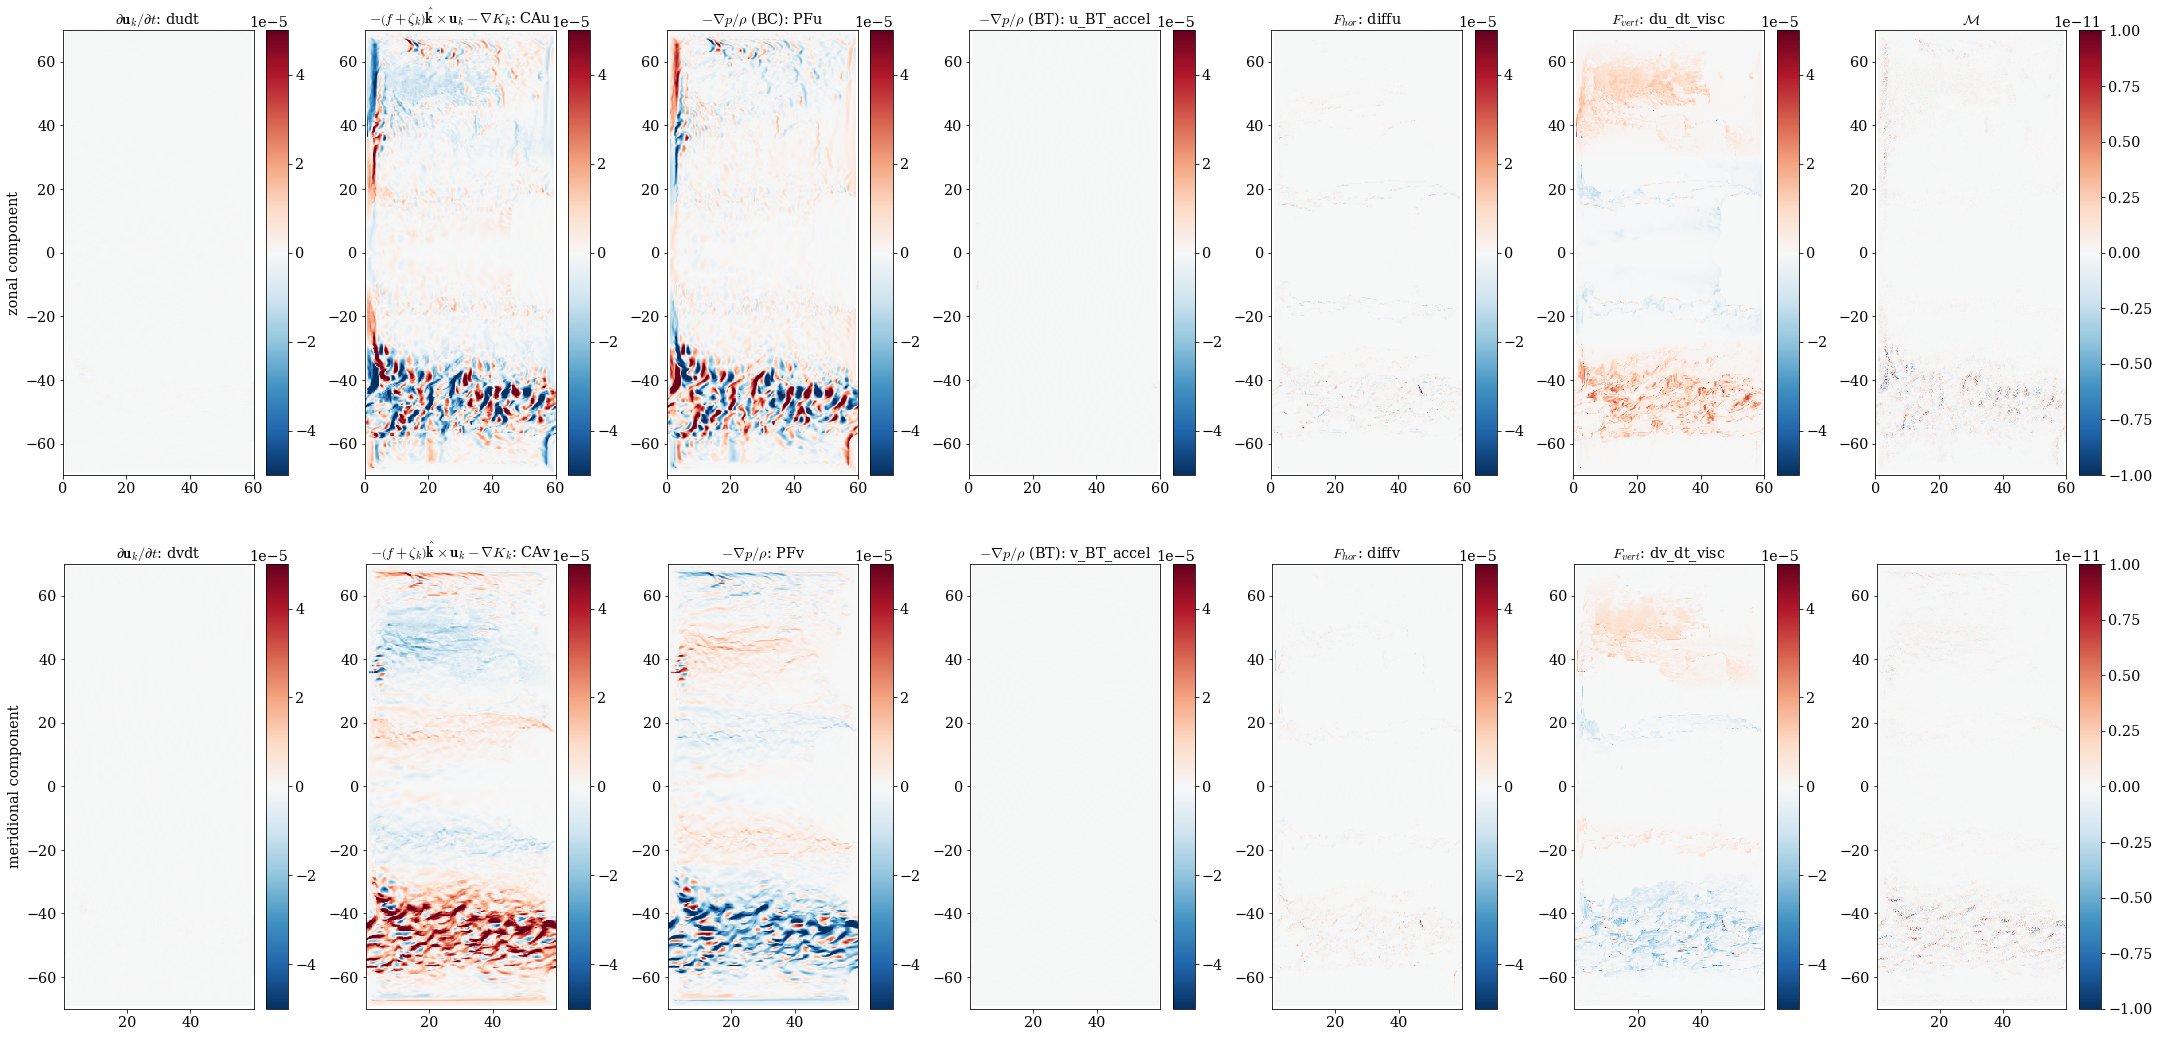

In [11]:
limlow=-5e-5; limhigh=5e-5;

plt.figure(figsize=(37,18))
plt.subplot(2,7,1)
plt.pcolormesh(xq,yh,term1_u,norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',vmin=limlow,vmax=limhigh)
plt.ylabel('zonal component')
plt.title(r'$\partial \mathbf{u}_k /\partial t$: dudt')
plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')


plt.subplot(2,7,2)
plt.pcolormesh(xq,yh,term2_u,norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',vmin=limlow,vmax=limhigh)
plt.title(r'$- \left({f} + {\zeta}_k \right) \hat{\mathbf{k}} \times \mathbf{u}_k - \nabla K_k$: CAu')
plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')


plt.subplot(2,7,3)
plt.pcolormesh(xq,yh,term3_u,norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',vmin=limlow,vmax=limhigh)
plt.title(r'$-\nabla p/\rho$ (BC): PFu')
plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')


plt.subplot(2,7,4)
plt.pcolormesh(xq,yh,term4_u,norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',vmin=limlow,vmax=limhigh)
plt.title(r'$-\nabla p/\rho$ (BT): u_BT_accel')
plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')


plt.subplot(2,7,5)
plt.pcolormesh(xq,yh,term5_u,norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',vmin=limlow,vmax=limhigh)
plt.title(r'$F_{hor}$: diffu')
plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')


plt.subplot(2,7,6)
plt.pcolormesh(xq,yh,term6_u,norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',vmin=limlow,vmax=limhigh)
plt.title(r'$F_{vert}$: du_dt_visc')
plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')


plt.subplot(2,7,7)
plt.pcolormesh(xq,yh,M_u,norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',vmin=-1e-11,vmax=1e-11)
plt.title(r'$\mathcal{M}$')
plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')

plt.subplot(2,7,8)
plt.pcolormesh(xh,yq,term1_v,norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',vmin=limlow,vmax=limhigh)
plt.title(r'$\partial \mathbf{u}_k /\partial t$: dvdt')
plt.ylabel('meridional component')
plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')


plt.subplot(2,7,9)
plt.pcolormesh(xh,yq,term2_v,norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',vmin=limlow,vmax=limhigh)
plt.title(r'$- \left({f} + {\zeta}_k \right) \hat{\mathbf{k}} \times \mathbf{u}_k - \nabla K_k$: CAv')
plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')


plt.subplot(2,7,10)
plt.pcolormesh(xh,yq,term3_v,norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',vmin=limlow,vmax=limhigh)
plt.title(r'$-\nabla p/\rho$: PFv')
plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')

plt.subplot(2,7,11)
plt.pcolormesh(xh,yq,term4_v,norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',vmin=limlow,vmax=limhigh)
plt.title(r'$-\nabla p/\rho$ (BT): v_BT_accel')
plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')

plt.subplot(2,7,12)
plt.pcolormesh(xh,yq,term5_v,norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',vmin=limlow,vmax=limhigh)
plt.title(r'$F_{hor}$: diffv')
plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')

plt.subplot(2,7,13)
plt.pcolormesh(xh,yq,term6_v,norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',vmin=limlow,vmax=limhigh)
plt.title(r'$F_{vert}$: dv_dt_visc')
plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')

plt.subplot(2,7,14)
plt.pcolormesh(xh,yq,M_v,norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',vmin=-1e-11,vmax=1e-11)
plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')

plt.savefig('Momentum_end_time_%i_days_tau_5_days_layer_%i.png' % (end_time,layer_no), dpi=200,bbox_inches='tight',pad_inches=0)

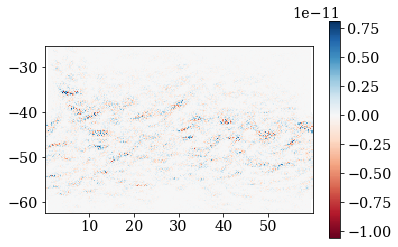

In [16]:
plt.pcolormesh(xh,yq[30:180],M_v[30:180,:],norm=MidpointNormalize(midpoint=0.),cmap='RdBu')
plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('zoom2.png', dpi=200,bbox_inches='tight',pad_inches=0)


In [31]:
sn

<xarray.Dataset>
Dimensions:     (time: 100, xh: 240, xq: 241, yh: 560, yq: 561, zl: 15)
Coordinates:
  * xq          (xq) float64 0.0 0.25 0.5 0.75 1.0 ... 59.25 59.5 59.75 60.0
  * yh          (yh) float64 -69.88 -69.62 -69.38 -69.12 ... 69.38 69.62 69.88
  * zl          (zl) float64 1.023e+03 1.023e+03 ... 1.028e+03 1.028e+03
  * time        (time) float64 3.000e+04 3.001e+04 ... 3.05e+04 3.05e+04
  * xh          (xh) float64 0.125 0.375 0.625 0.875 ... 59.12 59.38 59.62 59.88
  * yq          (yq) float64 -70.0 -69.75 -69.5 -69.25 ... 69.25 69.5 69.75 70.0
Data variables:
    u           (time, zl, yh, xq) float32 ...
    v           (time, zl, yq, xh) float32 ...
    h           (time, zl, yh, xh) float32 ...
    KE          (time, zl, yh, xh) float32 ...
    dKE_dt      (time, zl, yh, xh) float32 ...
    PE_to_KE    (time, zl, yh, xh) float32 ...
    KE_CorAdv   (time, zl, yh, xh) float32 ...
    KE_adv      (time, zl, yh, xh) float32 ...
    KE_visc     (time, zl, yh, xh) float32 ...
    KE_horvisc  (time, zl, yh, xh) float32 ...
    u_BT_accel  (time, zl, yh, xq) float32 ...
    v_BT_accel  (time, zl, yq, xh) float32 ...
    PFu         (time, zl, yh, xq) float32 ...
    PFv         (time, zl, yq, xh) float32 ...
Attributes:
    filename:          snapshots_00030005.nc
    title:             NeverWorld2
    associated_files:  area_t: static.nc
    grid_type:         regular
    grid_tile:         N/A

In [12]:
def interp_u2_to_center(u):
    n,layers,ly,lx_p_1 = u.shape
    lx = lx_p_1 - 1
    u_center = np.zeros((n,layers,ly,lx))
    u_center[:,:,:,:] = (u[:,:,:,:-1] + u[:,:,:,1:])/2
    u_center[:,:,:,0] = (u[:,:,:,0] + u[:,:,:,-1])/2 # periodic
    u_center[:,:,:,-1] = (u[:,:,:,0] + u[:,:,:,-1])/2 # periodic
    
    return u_center
    
def interp_v2_to_center(v):
    n,layers,ly_p_1,lx = v.shape
    ly = ly_p_1 - 1
    v_center = np.zeros((n,layers,ly,lx))
    v_center[:,:,:,:] = (v[:,:,:-1,:] + v[:,:,1:,:])/2
    
    return v_center

def interp_to_center(A):
    n,layers,ly_p_1,lx_p_1 = A.shape
    ly = ly_p_1 - 1
    lx = lx_p_1 - 1
    A_center = np.zeros((n,layers,ly,lx))
    A_center[:,:,:,:] = (A[:,:,:-1,:-1] + A[:,:,1:,1:])/2 
    
    return A_center

In [14]:
layer_no=0
term1_E = av.dKE_dt.astype(float).values[-1,layer_no]
term2_E = av.KE_CorAdv.astype(float).values[-1,layer_no]
term3_E = av.PE_to_KE.astype(float).values[-1,layer_no]
term4_E = av.KE_BT.astype(float).values[-1,layer_no]
term5_E = av.KE_visc.astype(float).values[-1,layer_no]
term6_E = av.KE_horvisc.astype(float).values[-1,layer_no]

In [16]:
E = term1_E  - (term2_E + term3_E + term4_E + term5_E + term6_E)

1.014086592476815e-10


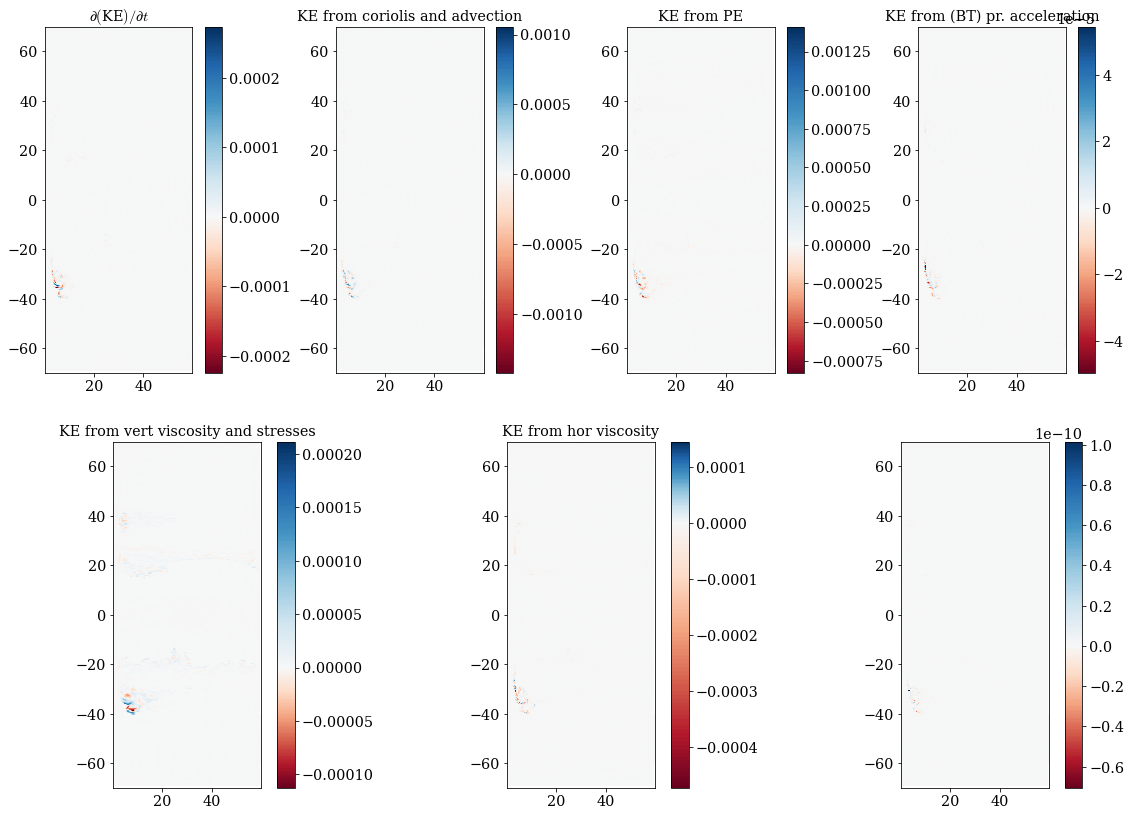

In [20]:
plt.figure(figsize=(20,14))

plt.subplot(2,4,1)
plt.pcolormesh(xh,yh,term1_E,norm=MidpointNormalize(midpoint=0.),cmap='RdBu')
plt.gca().set_aspect('equal', adjustable='box')
plt.title(r'$\partial ($KE$)/\partial t$')
plt.colorbar()

plt.subplot(2,4,2)
plt.pcolormesh(xh,yh,term2_E,norm=MidpointNormalize(midpoint=0.),cmap='RdBu')
plt.gca().set_aspect('equal', adjustable='box')
plt.title(r'KE from coriolis and advection')
plt.colorbar()

plt.subplot(2,4,3)
plt.pcolormesh(xh,yh,term3_E,norm=MidpointNormalize(midpoint=0.),cmap='RdBu')
plt.gca().set_aspect('equal', adjustable='box')
plt.title(r'KE from PE')
plt.colorbar()

plt.subplot(2,4,4)
plt.pcolormesh(xh,yh,term4_E,norm=MidpointNormalize(midpoint=0.),cmap='RdBu')
plt.gca().set_aspect('equal', adjustable='box')
plt.title(r'KE from (BT) pr. acceleration')
plt.colorbar()

# plt.subplot(2,4,4)
# plt.pcolormesh(xh,yh,term4_E,norm=MidpointNormalize(midpoint=0.),cmap='RdBu')
# plt.gca().set_aspect('equal', adjustable='box')
# plt.title(r'KE from (baroclinic) pr. acceleration')
# plt.colorbar()

plt.subplot(2,3,4)
plt.pcolormesh(xh,yh,term5_E,norm=MidpointNormalize(midpoint=0.),cmap='RdBu')
plt.gca().set_aspect('equal', adjustable='box')
plt.title(r'KE from vert viscosity and stresses')
plt.colorbar()

plt.subplot(2,3,5)
plt.pcolormesh(xh,yh,term6_E,norm=MidpointNormalize(midpoint=0.),cmap='RdBu')
plt.gca().set_aspect('equal', adjustable='box')
plt.title(r'KE from hor viscosity')
plt.colorbar()

plt.subplot(2,3,6)
plt.pcolormesh(xh,yh,E,norm=MidpointNormalize(midpoint=0.),cmap='RdBu')
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()

print(np.nanmax(E))
plt.savefig('KE_end_time_%i_days_tau_%i_days_layer_%i.png' % (end_time,tau/86400,layer_no), dpi=200,bbox_inches='tight',pad_inches=0)




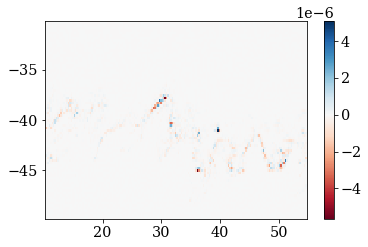

In [51]:
plt.figure(figsize=(20,8))
plt.subplot(2,3,6)
plt.pcolormesh(xh[40:220],yh[80:160],E[80:160,40:220],norm=MidpointNormalize(midpoint=0.),cmap='RdBu')
plt.colorbar()
# plt.gca().set_aspect('equal', adjustable='box')

plt.savefig('zoom4.png', dpi=200,bbox_inches='tight',pad_inches=0)

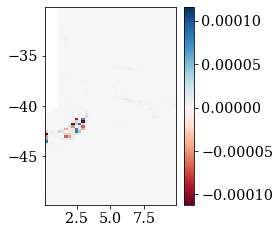

In [52]:
plt.figure(figsize=(10,8))
plt.subplot(2,3,6)
plt.pcolormesh(xh[:40],yh[80:160],E[80:160,:40],norm=MidpointNormalize(midpoint=0.),cmap='RdBu')
plt.colorbar()
# plt.gca().set_aspect('equal', adjustable='box')

plt.savefig('zoom5.png', dpi=200,bbox_inches='tight',pad_inches=0)

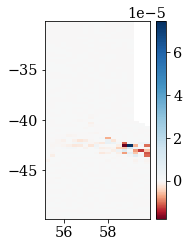

In [53]:
plt.figure(figsize=(8,8))
plt.subplot(2,3,6)
plt.pcolormesh(xh[220:],yh[80:160],E[80:160,220:],norm=MidpointNormalize(midpoint=0.),cmap='RdBu')
plt.colorbar()
# plt.gca().set_aspect('equal', adjustable='box')

plt.savefig('zoom6.png', dpi=200,bbox_inches='tight',pad_inches=0)